In [1]:

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm


import sys
sys.path.insert(1, r'C:\dlc_projects\Analysis\git_repo\util')

import HMM_decoding as decoding

import single_ts as ts
from iteration import dlc_iter
from kinematics import dlc_kinematics
from visualization_config import visual_config



#initiate functions 
fetch=ts.dlc_ts()
kin=dlc_kinematics()
iter=dlc_iter()
vs_config=visual_config()


hmm_machine=r'C:\dlc_projects\Analysis\git_repo\data\3DHMM.pkl'
with open(hmm_machine, "rb") as file: model=pickle.load(file)


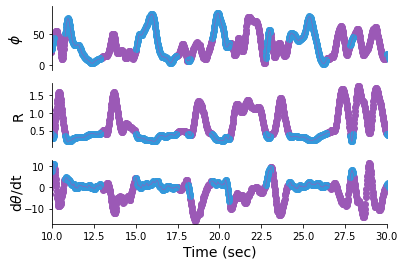

In [2]:
evaluate=['LID']
fetch.treatments=evaluate
file=r'C:\dlc_projects\Analysis\Currencodes\DLC_refact\d_base\d_base.npy'
dct=fetch.get_treatments(file)

ID_n=5
time_point=30

strt=10
fini=30
cut=3000
fps=50


fig, ax = plt.subplots(3)
ax=vs_config.visualize_ts_state(ax, dct,  ID_n, time_point,strt, fini, fetch, model, cut, fps )

#plt.tight_layout()
plt.draw()

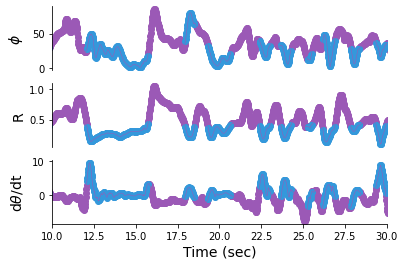

In [3]:
evaluate=['SUM']
fetch.treatments=evaluate
file=r'C:\dlc_projects\Analysis\Currencodes\DLC_refact\d_base\d_base.npy'
dct=fetch.get_treatments(file)

ID_n=4
time_point=30

strt=10
fini=30
cut=3000
fps=50


fig, ax = plt.subplots(3)
ax=vs_config.visualize_ts_state(ax, dct,  ID_n, time_point,strt, fini, fetch, model, cut, fps )

#plt.tight_layout()
plt.draw()

#The inside out 

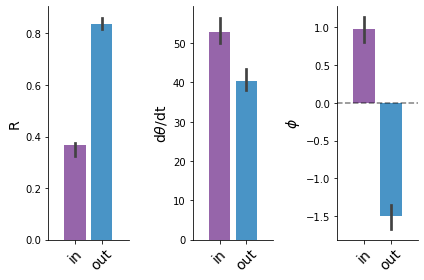

In [9]:
evaluate=['LID']
fetch.treatments=evaluate
file=r'C:\dlc_projects\Analysis\Currencodes\DLC_refact\d_base\d_base.npy'
dct=fetch.get_treatments(file)

time_point=30


in_andout=decoding.inside_out(dct, model, kin, time_point)
characters=pd.DataFrame(in_andout, columns=['ar', 'head_ang', 'rot_speed', 'animal', 'treatment', 'Type'])
characters.head()
n=7
fig, ax = plt.subplots(1,3)

params={'ar':r'R',   'rot_speed':r'd$\theta$/dt', 'head_ang' : r'$\phi $'}
ax=vs_config.cluster_bar_plots(ax, characters, params)

plt.draw()

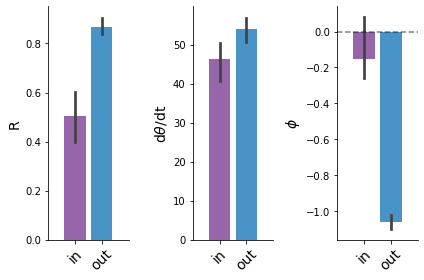

In [10]:
evaluate=['SUM']
fetch.treatments=evaluate
file=r'C:\dlc_projects\Analysis\Currencodes\DLC_refact\d_base\d_base.npy'
dct=fetch.get_treatments(file)

time_point=30


in_andout=decoding.inside_out(dct, model, kin, time_point)
characters=pd.DataFrame(in_andout, columns=['ar', 'head_ang', 'rot_speed', 'animal', 'treatment', 'Type'])
characters.head()
n=7
fig, ax = plt.subplots(1,3)

params={'ar':r'R',   'rot_speed':r'd$\theta$/dt', 'head_ang' : r'$\phi $'}
ax=vs_config.cluster_bar_plots(ax, characters, params, n=5)

plt.draw()
